# 01 Explore Fleurie

In this notebook, I will get info about Fleurie's geo files found.  
The geo files are found in the `data/shapefiles` and `data/geojson` directories and come from various sources:
- [Cadastre](https://cadastre.data.gouv.fr/data/etalab-cadastre/2024-04-01/geojson/france/)
- [Délimitation Parcellaire des AOC Viticoles de l'INAO](https://www.data.gouv.fr/en/datasets/delimitation-parcellaire-des-aoc-viticoles-de-linao/)

The goal of this notebook is to take advantage of Geopandas to explore the geo files and its features.

In [1]:
# Import libraries
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
data_path = Path('./data')
# Look for the commune geojson file
geojson_communes_path = list(data_path.glob('**/*communes*.geojson'))
# Only one file found, as expected
geojson_communes_path

[PosixPath('data/geojson/fleurie-communes.geojson')]

In [3]:
# Read the file and display its content
commune_gdf = gpd.read_file(geojson_communes_path[0])
commune_gdf

,id,nom,created,updated,geometry
0,69084,FLEURIE,2007-10-05,2023-06-02,"MULTIPOLYGON (((4.69681 46.17382, 4.69687 46.1..."


In [4]:
# Display the CRS used
commune_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
# Keep the bounds of the commune
total_bounds = tuple(commune_gdf.total_bounds)
# total_bounds is a tuple with the minx, miny, maxx, maxy values
total_bounds

(4.6631481, 46.1738169, 4.7252502, 46.216595)

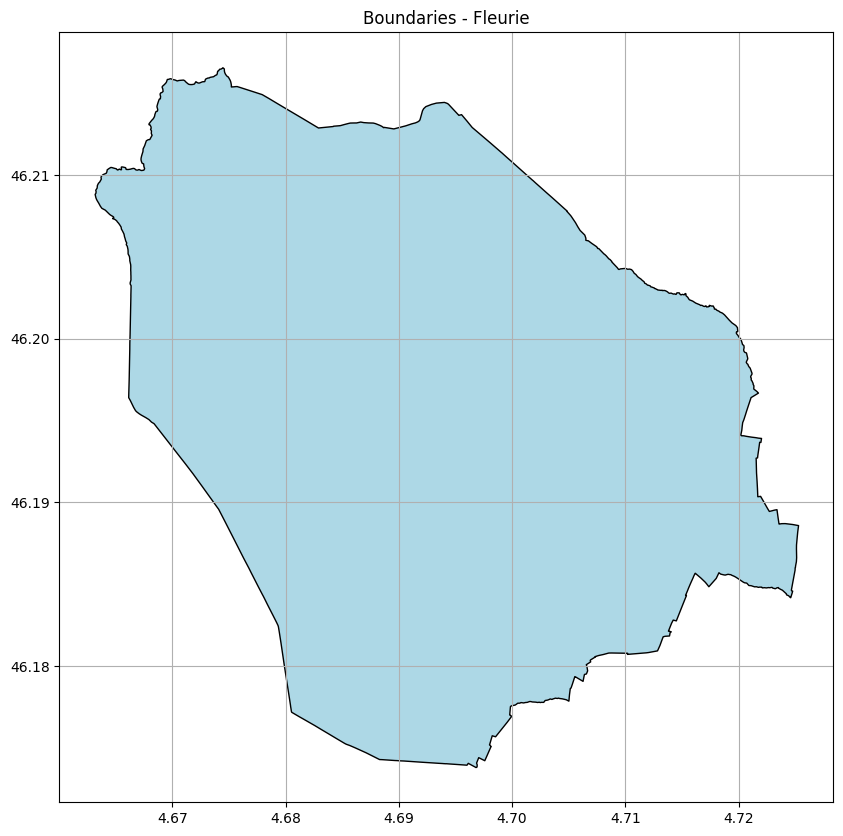

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
commune_gdf.plot(
    ax=ax,
    color='lightblue',
    edgecolor='black'
)
# add grid
ax.grid()
# add title
ax.set_title('Boundaries - Fleurie')
plt.show()

In [7]:
# Nos let's display the parcelles
geojson_parcelles_path = list(data_path.glob('**/*parcelles*.geojson'))
# Only one file found, as expected
geojson_parcelles_path

[PosixPath('data/geojson/fleurie-parcelles.geojson')]

In [8]:
# Read the file and display its content
parcelle_gdf = gpd.read_file(geojson_parcelles_path[0])
parcelle_gdf

,id,commune,prefixe,section,numero,contenance,arpente,created,updated,geometry
0,69084000AB0393,69084,000,AB,393,10817,False,2007-09-17,2014-02-06,"POLYGON ((4.69761 46.18880, 4.69769 46.18875, ..."
1,69084000AB0342,69084,000,AB,342,15444,False,2007-09-17,2014-02-06,"POLYGON ((4.69732 46.19123, 4.69737 46.19118, ..."
2,69084000AB0093,69084,000,AB,93,5460,False,2007-09-17,2014-02-06,"POLYGON ((4.69342 46.19233, 4.69376 46.19218, ..."
3,69084000AB0195,69084,000,AB,195,14425,False,2007-09-17,2014-02-06,"POLYGON ((4.70458 46.19070, 4.70484 46.19095, ..."
4,69084000AB0287,69084,000,AB,287,9548,False,2007-09-17,2014-02-06,"POLYGON ((4.70025 46.18966, 4.70068 46.18991, ..."
...,...,...,...,...,...,...,...,...,...,...
4218,69084000AP0004,69084,000,AP,4,42,False,2007-09-17,2014-02-06,"POLYGON ((4.70130 46.21001, 4.70122 46.21006, ..."
4219,69084000AP0022,69084,000,AP,22,3056,False,2007-09-17,2014-02-06,"POLYGON ((4.70231 46.20919, 4.70305 46.20843, ..."
4220,69084000AP0021,69084,000,AP,21,3175,False,2007-09-17,2014-02-06,"POLYGON ((4.70269 46.20824, 4.70270 46.20823, ..."
4221,69084000AP0011,69084,000,AP,11,415,False,2007-09-17,2014-02-06,"POLYGON ((4.70091 46.20829, 4.70106 46.20826, ..."


In [9]:
# display the CRS used
parcelle_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

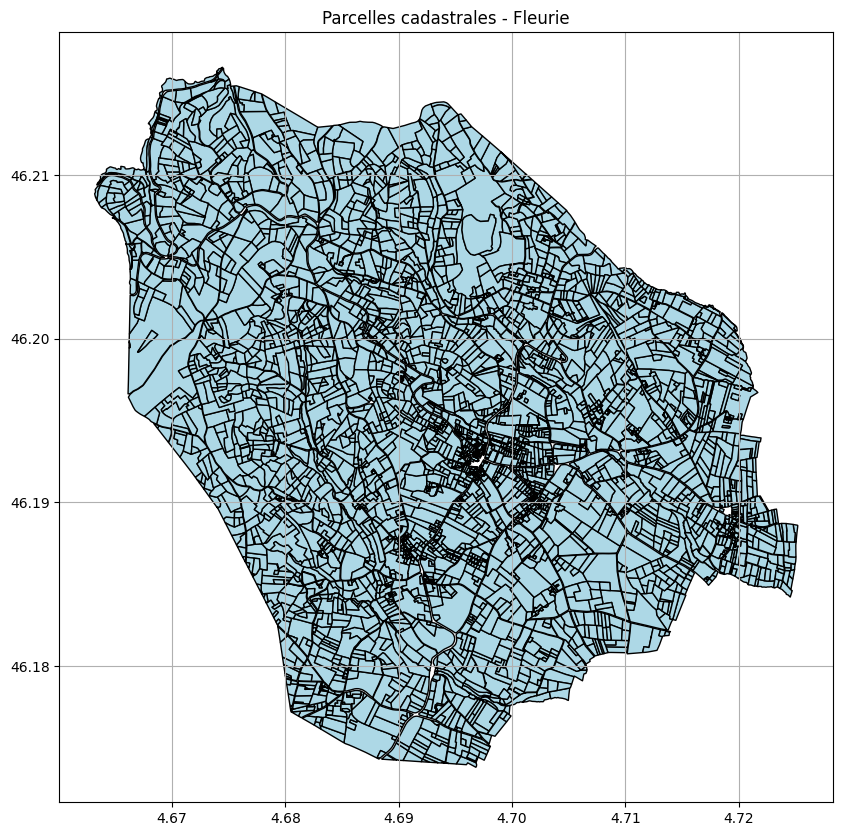

In [10]:
# Lot of information here
fig, ax = plt.subplots(figsize=(10, 10))
parcelle_gdf.plot(
    ax=ax,
    color='lightblue',
    edgecolor='black'
)
# add grid
ax.grid()
# add title
ax.set_title('Parcelles cadastrales - Fleurie')
plt.show()

In [11]:
# What about buildings
geojson_buildings_path = list(data_path.glob('**/*batiments*.geojson'))
# Only one file found, as expected
geojson_buildings_path

[PosixPath('data/geojson/fleurie-batiments.geojson')]

In [12]:
# Read the file and display its content
building_gdf = gpd.read_file(geojson_buildings_path[0])
building_gdf

,type,nom,commune,created,updated,geometry
0,01,None,69084,2007-09-17,2018-04-23,"MULTIPOLYGON (((4.69701 46.19046, 4.69681 46.1..."
1,01,None,69084,2016-05-11,2018-04-23,"MULTIPOLYGON (((4.69814 46.18897, 4.69831 46.1..."
2,02,None,69084,2016-05-11,2018-04-23,"MULTIPOLYGON (((4.69822 46.18902, 4.69827 46.1..."
3,02,None,69084,2016-05-11,2018-04-23,"MULTIPOLYGON (((4.69790 46.18926, 4.69810 46.1..."
4,01,None,69084,2016-05-11,2018-04-23,"MULTIPOLYGON (((4.69799 46.18937, 4.69786 46.1..."
...,...,...,...,...,...,...
1543,01,None,69084,2007-09-17,2018-04-23,"MULTIPOLYGON (((4.70858 46.20440, 4.70838 46.2..."
1544,02,None,69084,2007-09-17,2018-04-23,"MULTIPOLYGON (((4.70858 46.20440, 4.70861 46.2..."
1545,02,None,69084,2007-09-17,2018-04-23,"MULTIPOLYGON (((4.70841 46.20429, 4.70841 46.2..."
1546,01,None,69084,2007-09-17,2018-04-23,"MULTIPOLYGON (((4.70125 46.20855, 4.70115 46.2..."


In [13]:
# display the CRS used
building_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

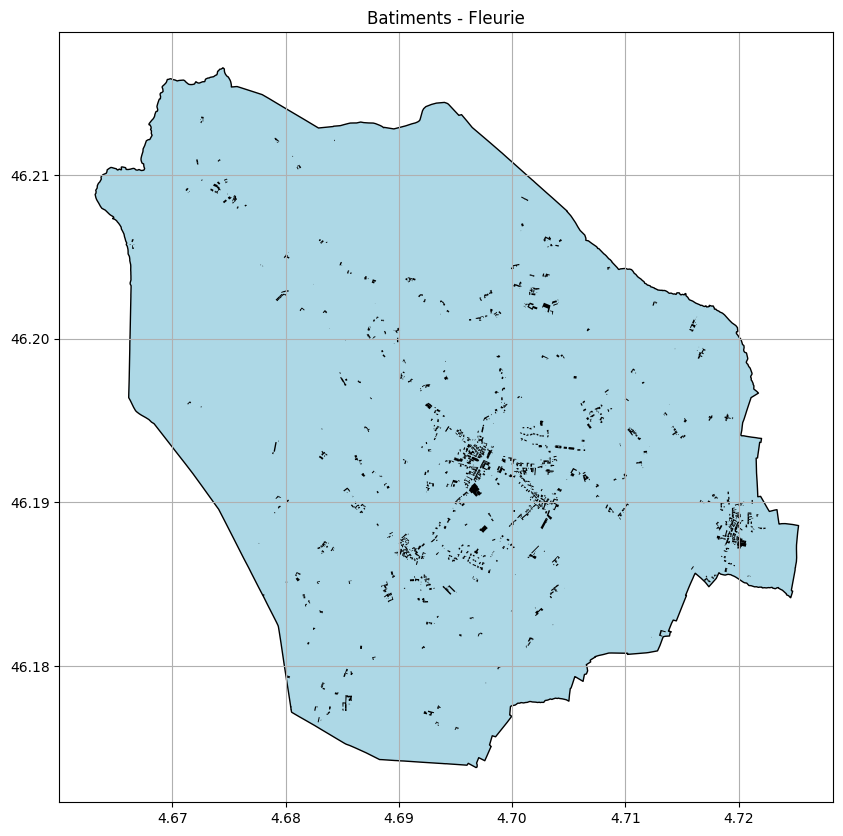

In [20]:
# Not much information here
fig, ax = plt.subplots(figsize=(10, 10))
commune_gdf.plot(
    ax=ax,
    color='lightblue',
    edgecolor='black'
)
building_gdf.plot(
    ax=ax,
    color='k',
)
# add grid
ax.grid()
# add title
ax.set_title('Batiments - Fleurie')
plt.show()

<Axes: >

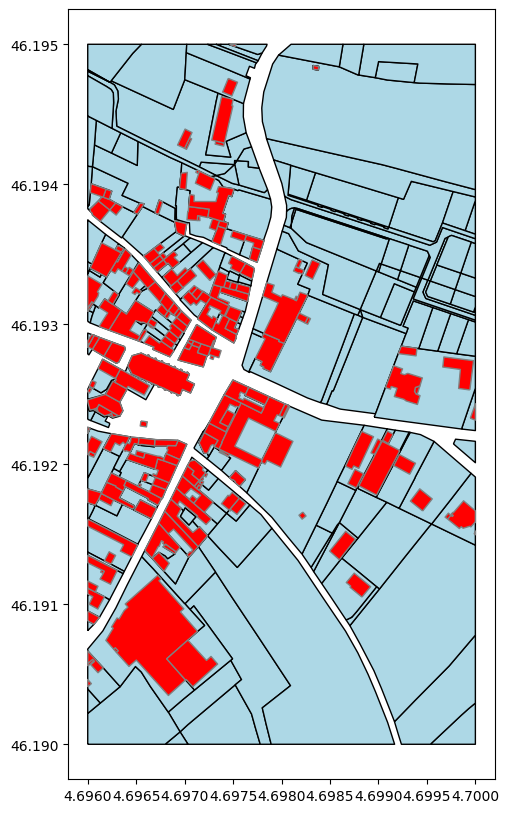

In [55]:
from shapely.lib import box

# clip to the center of the commune
center_boundaries = (4.696, 46.19, 4.70, 46.195)
fig, ax = plt.subplots(figsize=(10, 10))
gpd.clip(parcelle_gdf, center_boundaries).plot(
    color='lightblue',
    edgecolor='black',
    ax=ax
)
gpd.clip(building_gdf, center_boundaries).plot(
    color='red',
    edgecolor='grey',
    ax=ax
)
